In [1]:
import pandas as pd

In [2]:
MIDPOINTS = {
    "N": {"Low": 180, "Medium": 420, "High": 700},
    "P": {"Low": 7,   "Medium": 18,  "High": 32},
    "K": {"Low": 75,  "Medium": 200, "High": 350}
}

In [3]:
SHC_DIST = {
    "Panruti": {
        "N": {"Low": 1.00, "Medium": 0.00, "High": 0.00},
        "P": {"Low": 0.14, "Medium": 0.45, "High": 0.40},
        "K": {"Low": 0.23, "Medium": 0.11, "High": 0.65}
    },
    "Kurinjipadi": {
        "N": {"Low": 1.00, "Medium": 0.00, "High": 0.00},
        "P": {"Low": 0.00, "Medium": 0.29, "High": 0.71},
        "K": {"Low": 0.51, "Medium": 0.49, "High": 0.00}
    },
    "Sankarapuram": {
        "N": {"Low": 1.00, "Medium": 0.00, "High": 0.00},
        "P": {"Low": 0.33, "Medium": 0.23, "High": 0.44},
        "K": {"Low": 0.13, "Medium": 0.56, "High": 0.31}
    },
    "Kallakurichi": {
        "N": {"Low": 1.00, "Medium": 0.00, "High": 0.00},
        "P": {"Low": 0.29, "Medium": 0.33, "High": 0.39},
        "K": {"Low": 0.24, "Medium": 0.57, "High": 0.19}
    },
    "Cuddalore": {
        "N": {"Low": 1.00, "Medium": 0.00, "High": 0.00},
        "P": {"Low": 0.02, "Medium": 0.38, "High": 0.60},
        "K": {"Low": 0.19, "Medium": 0.78, "High": 0.03}
    }
}

In [4]:
soil_values = {}

for block, nutrients in SHC_DIST.items():
    soil_values[block] = {}
    for nutrient, dist in nutrients.items():
        total = 0
        for class_name, pct in dist.items():
            total += pct * MIDPOINTS[nutrient][class_name]
        soil_values[block][f"Soil_{nutrient}"] = round(total, 2)

# Convert dict → DataFrame
soil_df = pd.DataFrame.from_dict(soil_values, orient='index').reset_index()
soil_df = soil_df.rename(columns={"index": "Agriblock"})

print(soil_df)

      Agriblock  Soil_N  Soil_P  Soil_K
0       Panruti   180.0   21.88  266.75
1   Kurinjipadi   180.0   27.94  136.25
2  Sankarapuram   180.0   20.53  230.25
3  Kallakurichi   180.0   20.45  198.50
4     Cuddalore   180.0   26.18  180.75


In [5]:
paddy_df = pd.read_csv("paddydataset.csv")
paddy_df = paddy_df.merge(soil_df, on="Agriblock", how="left")

In [6]:
paddy_df.head(10)

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Soil_N,Soil_P,Soil_K
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,WSW,72.0,78,88,85,540,35028,180.0,26.18,180.75
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,SSE,64.6,85,84,87,600,35412,180.0,27.94,136.25
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,W,85.0,96,84,79,600,36300,180.0,21.88,266.75
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,S,88.5,95,81,84,540,35016,180.0,20.45,198.50
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,NW,72.7,91,83,81,600,34044,180.0,20.53,230.25
5,6,Chinnasalem,delux ponni,alluvial,150,75.0,wet,120,6,240,...,NNW,78.6,80,92,88,480,36732,NaN,NaN,NaN
6,6,Cuddalore,CO_43,clay,150,75.0,wet,120,6,240,...,WSW,72.0,78,88,85,540,33162,180.0,26.18,180.75
7,6,Kurinjipadi,delux ponni,alluvial,150,75.0,dry,120,6,240,...,SSE,64.6,85,84,87,480,36690,180.0,27.94,136.25
8,6,Panruti,ponmani,clay,150,75.0,dry,120,6,240,...,W,85.0,96,84,79,600,35310,180.0,21.88,266.75
9,6,Kallakurichi,CO_43,alluvial,150,75.0,dry,120,6,240,...,S,88.5,95,81,84,540,32460,180.0,20.45,198.50


In [7]:
paddy_df[["Agriblock", "Soil_N", "Soil_P", "Soil_K"]].head()

,Agriblock,Soil_N,Soil_P,Soil_K
0,Cuddalore,180.0,26.18,180.75
1,Kurinjipadi,180.0,27.94,136.25
2,Panruti,180.0,21.88,266.75
3,Kallakurichi,180.0,20.45,198.50
4,Sankarapuram,180.0,20.53,230.25


In [8]:
paddy_df.shape


(2789, 48)

In [9]:
paddy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2789 non-null   int64  
 1   Agriblock                           2789 non-null   object 
 2   Variety                             2789 non-null   object 
 3   Soil Types                          2789 non-null   object 
 4   Seedrate(in Kg)                     2789 non-null   int64  
 5   LP_Mainfield(in Tonnes)             2789 non-null   float64
 6   Nursery                             2789 non-null   object 
 7   Nursery area (Cents)                2789 non-null   int64  
 8   LP_nurseryarea(in Tonnes)           2789 non-null   int64  
 9   DAP_20days                          2789 non-null   int64  
 10  Weed28D_thiobencarb                 2789 non-null   int64  
 11  Urea_40Days                         2789 no

In [10]:
paddy_df.head()

,Hectares,Agriblock,Variety,Soil Types,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery,Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,...,Wind Direction_D91_D120,Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Soil_N,Soil_P,Soil_K
0,6,Cuddalore,CO_43,alluvial,150,75.0,dry,120,6,240,...,WSW,72.0,78,88,85,540,35028,180.0,26.18,180.75
1,6,Kurinjipadi,ponmani,clay,150,75.0,wet,120,6,240,...,SSE,64.6,85,84,87,600,35412,180.0,27.94,136.25
2,6,Panruti,delux ponni,alluvial,150,75.0,dry,120,6,240,...,W,85.0,96,84,79,600,36300,180.0,21.88,266.75
3,6,Kallakurichi,CO_43,clay,150,75.0,wet,120,6,240,...,S,88.5,95,81,84,540,35016,180.0,20.45,198.50
4,6,Sankarapuram,ponmani,alluvial,150,75.0,dry,120,6,240,...,NW,72.7,91,83,81,600,34044,180.0,20.53,230.25


In [11]:
paddy_df.describe()

,Hectares,Seedrate(in Kg),LP_Mainfield(in Tonnes),Nursery area (Cents),LP_nurseryarea(in Tonnes),DAP_20days,Weed28D_thiobencarb,Urea_40Days,Potassh_50Days,Micronutrients_70Days,...,Inst Wind Speed_D91_D120(in Knots),Relative Humidity_D1_D30,Relative Humidity_D31_D60,Relative Humidity_D61_D90,Relative Humidity_D91_D120,Trash(in bundles),Paddy yield(in Kg),Soil_N,Soil_P,Soil_K
count,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,...,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2789.000000,2379.0,2379.000000,2379.000000
mean,3.717461,92.936536,46.468268,74.349229,3.717461,148.698458,7.434923,100.854729,38.587250,55.761922,...,9.449265,76.256938,87.594120,85.160272,83.859448,335.510936,22517.728935,180.0,23.339781,202.692518
std,1.437777,35.944420,17.972210,28.755536,1.437777,57.511072,2.875554,39.006885,14.924123,21.566652,...,2.516664,8.001361,6.776736,3.492529,3.134875,134.314772,9199.661393,0.0,3.113076,43.851557
min,1.000000,25.000000,12.500000,20.000000,1.000000,40.000000,2.000000,27.130000,10.380000,15.000000,...,6.000000,64.600000,78.000000,81.000000,79.000000,80.000000,5410.000000,180.0,20.450000,136.250000
25%,3.000000,75.000000,37.500000,60.000000,3.000000,120.000000,6.000000,81.390000,31.140000,45.000000,...,6.000000,72.000000,80.000000,83.000000,81.000000,240.000000,16389.000000,180.0,20.530000,180.750000
50%,4.000000,100.000000,50.000000,80.000000,4.000000,160.000000,8.000000,108.520000,41.520000,60.000000,...,10.000000,72.700000,91.000000,84.000000,84.000000,360.000000,24636.000000,180.0,21.880000,198.500000
75%,5.000000,125.000000,62.500000,100.000000,5.000000,200.000000,10.000000,135.650000,51.900000,75.000000,...,12.000000,85.000000,95.000000,88.000000,87.000000,450.000000,31035.000000,180.0,26.180000,230.250000
max,6.000000,150.000000,75.000000,120.000000,6.000000,240.000000,12.000000,162.780000,62.280000,90.000000,...,12.000000,88.500000,96.000000,92.000000,88.000000,600.000000,38814.000000,180.0,27.940000,266.750000


In [12]:
paddy_df.isnull().sum()

Hectares                                0
Agriblock                               0
Variety                                 0
Soil Types                              0
Seedrate(in Kg)                         0
LP_Mainfield(in Tonnes)                 0
Nursery                                 0
Nursery area (Cents)                    0
LP_nurseryarea(in Tonnes)               0
DAP_20days                              0
Weed28D_thiobencarb                     0
Urea_40Days                             0
Potassh_50Days                          0
Micronutrients_70Days                   0
Pest_60Day(in ml)                       0
30DRain( in mm)                         0
30DAI(in mm)                            0
30_50DRain( in mm)                      0
30_50DAI(in mm)                         0
51_70DRain(in mm)                       0
51_70AI(in mm)                          0
71_105DRain(in mm)                      0
71_105DAI(in mm)                        0
Min temp_D1_D30                   

In [13]:
print(paddy_df["Agriblock"].unique())

['Cuddalore' 'Kurinjipadi' 'Panruti' 'Kallakurichi' 'Sankarapuram'
 'Chinnasalem']


In [14]:
soil_df = pd.DataFrame({
    "Agriblock": [
        "Cuddalore",
        "Kurinjipadi",
        "Panruti",
        "Kallakurichi",
        "Sankarapuram",
        "Chinnasalem"
    ],
    "Soil_N": [180.0, 180.0, 180.0, 180.0, 180.0, 180.0],
    "Soil_P": [26.18, 27.94, 21.88, 20.45, 20.53, 20.45],
    "Soil_K": [180.75, 136.25, 266.75, 198.50, 230.25, 198.50]
})


In [15]:
paddy_df = paddy_df.drop(columns=["Soil_N","Soil_P","Soil_K"], errors="ignore")

paddy_df = paddy_df.merge(soil_df, on="Agriblock", how="left")


In [16]:
paddy_df[["Soil_N","Soil_P","Soil_K"]].isnull().sum()

Soil_N    0
Soil_P    0
Soil_K    0
dtype: int64

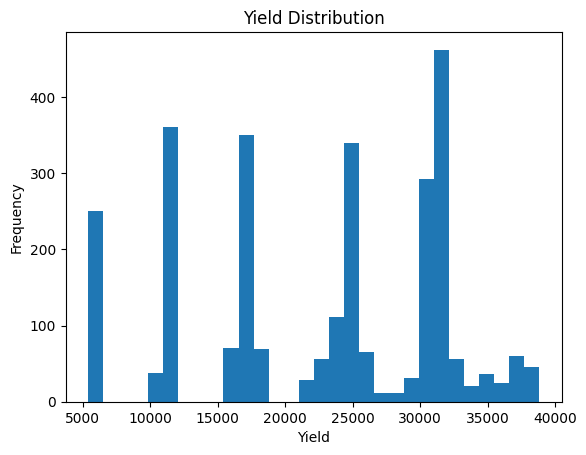

In [17]:
import matplotlib.pyplot as plt

plt.hist(paddy_df["Paddy yield(in Kg)"], bins=30)
plt.title("Yield Distribution")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

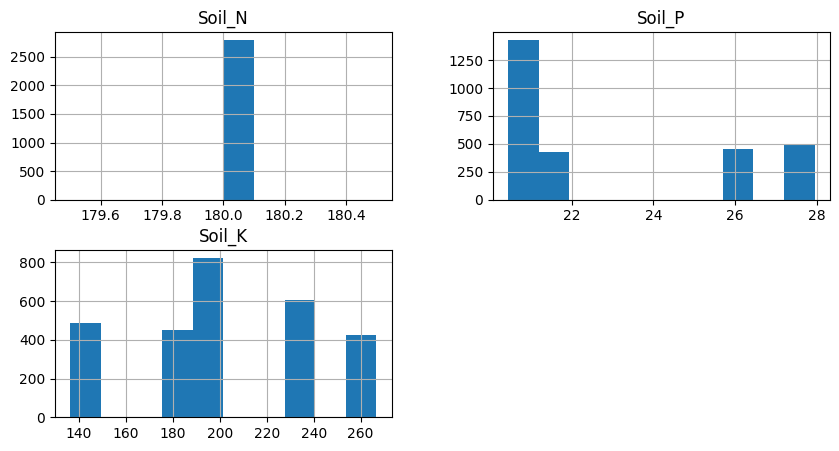

In [18]:
cols = ["Soil_N", "Soil_P", "Soil_K"]

paddy_df[cols].hist(figsize=(10,5))
plt.show()

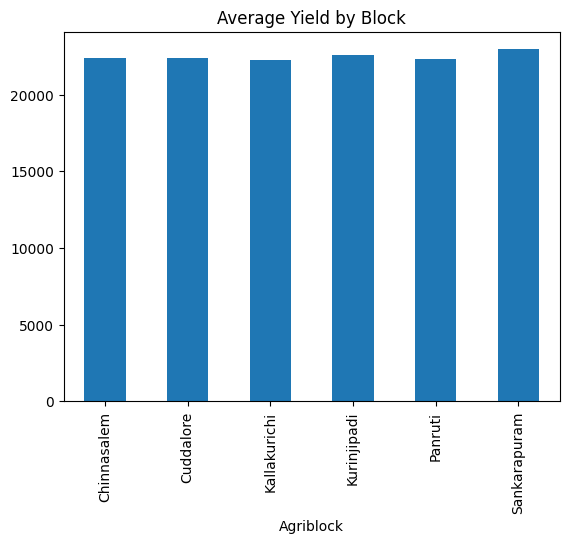

In [19]:
paddy_df.groupby("Agriblock")["Paddy yield(in Kg)"].mean().plot(kind="bar")
plt.title("Average Yield by Block")
plt.show()


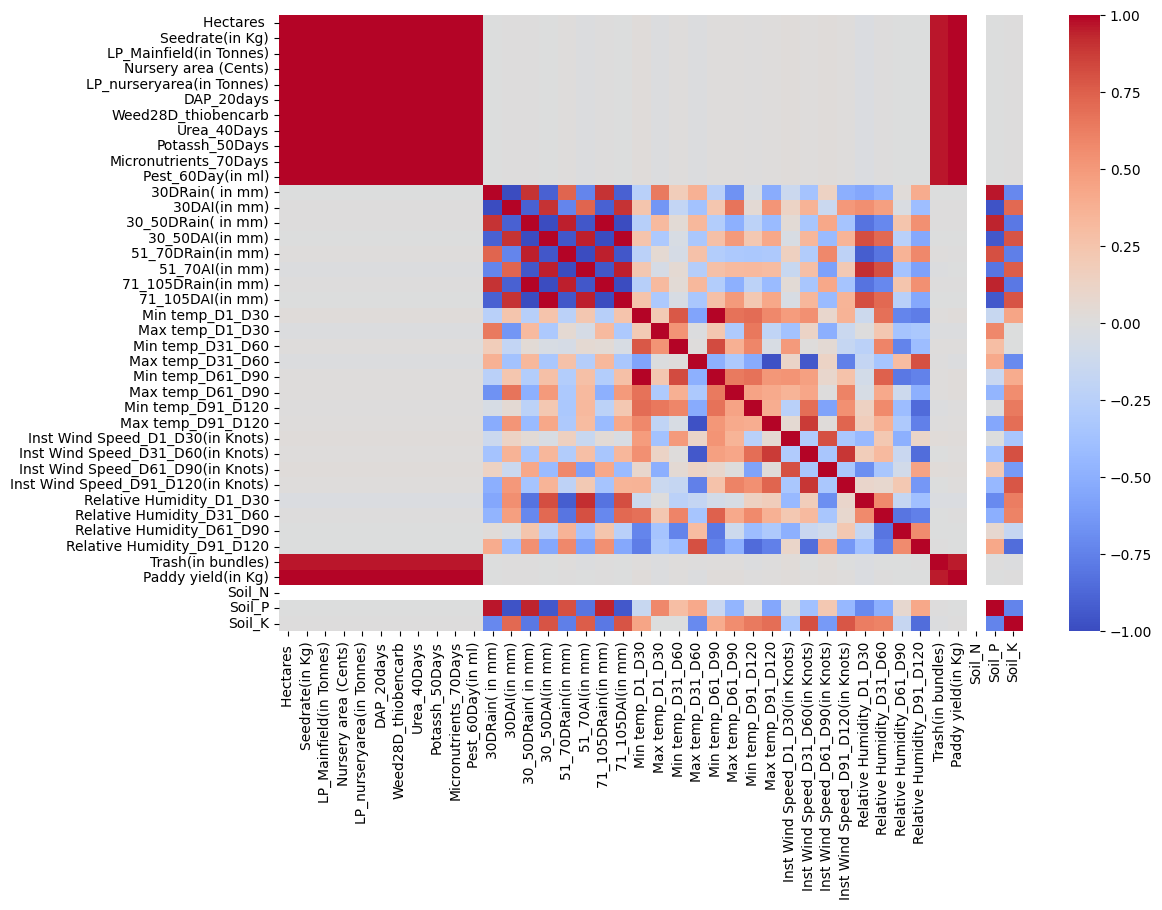

In [20]:
import seaborn as sns

numeric_df = paddy_df.select_dtypes(include="number")

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.show()


In [21]:
print(paddy_df.columns)

Index(['Hectares ', 'Agriblock', 'Variety', 'Soil Types', 'Seedrate(in Kg)',
       'LP_Mainfield(in Tonnes)', 'Nursery', 'Nursery area (Cents)',
       'LP_nurseryarea(in Tonnes)', 'DAP_20days', 'Weed28D_thiobencarb',
       'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days',
       'Pest_60Day(in ml)', '30DRain( in mm)', '30DAI(in mm)',
       '30_50DRain( in mm)', '30_50DAI(in mm)', '51_70DRain(in mm)',
       '51_70AI(in mm)', '71_105DRain(in mm)', '71_105DAI(in mm)',
       'Min temp_D1_D30', 'Max temp_D1_D30', 'Min temp_D31_D60',
       'Max temp_D31_D60', 'Min temp_D61_D90', 'Max temp_D61_D90',
       'Min temp_D91_D120', 'Max temp_D91_D120',
       'Inst Wind Speed_D1_D30(in Knots)', 'Inst Wind Speed_D31_D60(in Knots)',
       'Inst Wind Speed_D61_D90(in Knots)',
       'Inst Wind Speed_D91_D120(in Knots)', 'Wind Direction_D1_D30',
       'Wind Direction_D31_D60', 'Wind Direction_D61_D90',
       'Wind Direction_D91_D120', 'Relative Humidity_D1_D30',
       'Relative Humi

In [22]:
paddy_df.columns = (
    paddy_df.columns
        .str.strip()                      # remove trailing spaces
        .str.lower()                      # lowercase
        .str.replace(" ", "_")            # spaces → underscore
        .str.replace("(", "", regex=False)
        .str.replace(")", "", regex=False)
        .str.replace("/", "_")
)


In [23]:
print(paddy_df.columns)


Index(['hectares', 'agriblock', 'variety', 'soil_types', 'seedratein_kg',
       'lp_mainfieldin_tonnes', 'nursery', 'nursery_area_cents',
       'lp_nurseryareain_tonnes', 'dap_20days', 'weed28d_thiobencarb',
       'urea_40days', 'potassh_50days', 'micronutrients_70days',
       'pest_60dayin_ml', '30drain_in_mm', '30daiin_mm', '30_50drain_in_mm',
       '30_50daiin_mm', '51_70drainin_mm', '51_70aiin_mm', '71_105drainin_mm',
       '71_105daiin_mm', 'min_temp_d1_d30', 'max_temp_d1_d30',
       'min_temp_d31_d60', 'max_temp_d31_d60', 'min_temp_d61_d90',
       'max_temp_d61_d90', 'min_temp_d91_d120', 'max_temp_d91_d120',
       'inst_wind_speed_d1_d30in_knots', 'inst_wind_speed_d31_d60in_knots',
       'inst_wind_speed_d61_d90in_knots', 'inst_wind_speed_d91_d120in_knots',
       'wind_direction_d1_d30', 'wind_direction_d31_d60',
       'wind_direction_d61_d90', 'wind_direction_d91_d120',
       'relative_humidity_d1_d30', 'relative_humidity_d31_d60',
       'relative_humidity_d61_d90'

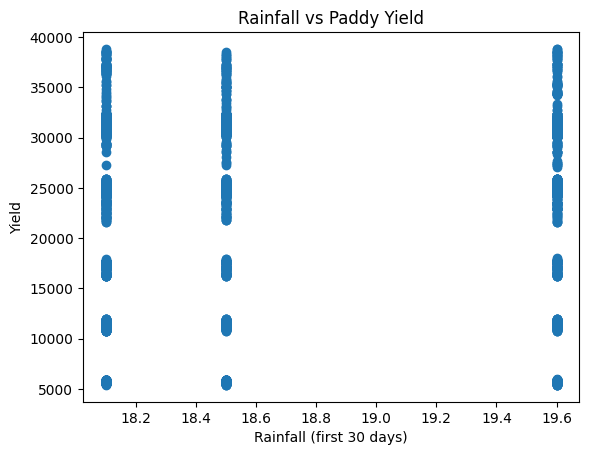

In [24]:
import matplotlib.pyplot as plt

plt.scatter(paddy_df["30drain_in_mm"],
            paddy_df["paddy_yieldin_kg"])

plt.xlabel("Rainfall (first 30 days)")
plt.ylabel("Yield")
plt.title("Rainfall vs Paddy Yield")
plt.show()


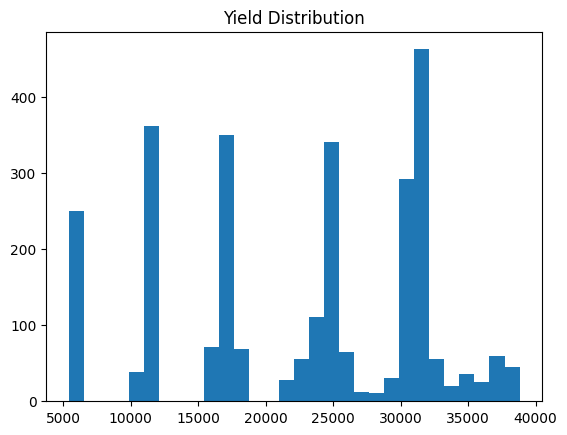

In [25]:
plt.hist(paddy_df["paddy_yieldin_kg"], bins=30)
plt.title("Yield Distribution")
plt.show()

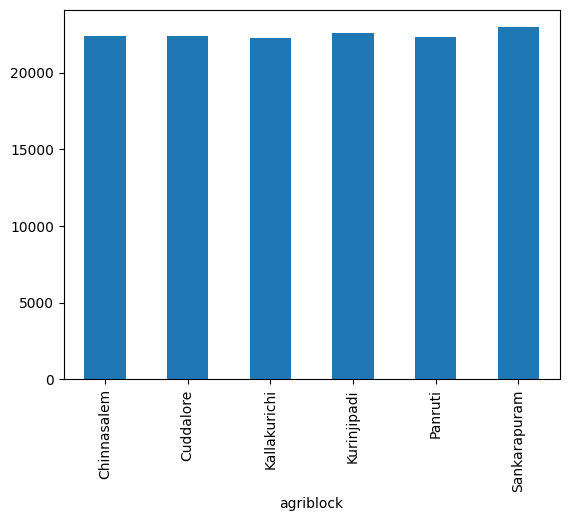

In [26]:
paddy_df.groupby("agriblock")["paddy_yieldin_kg"].mean().plot(kind="bar")
plt.show()


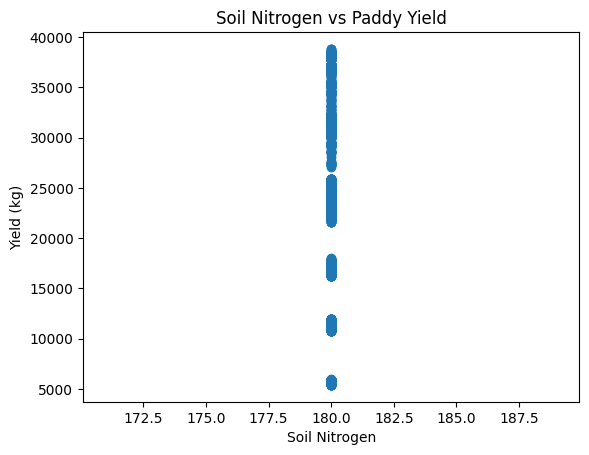

In [27]:
plt.scatter(paddy_df["soil_n"], paddy_df["paddy_yieldin_kg"])
plt.xlabel("Soil Nitrogen")
plt.ylabel("Yield (kg)")
plt.title("Soil Nitrogen vs Paddy Yield")
plt.show()

In [28]:
from sklearn.ensemble import RandomForestRegressor

X = paddy_df.select_dtypes("number").drop(columns=["paddy_yieldin_kg"])
y = paddy_df["paddy_yieldin_kg"]

model = RandomForestRegressor()
model.fit(X, y)

pd.Series(model.feature_importances_, index=X.columns)\
    .sort_values(ascending=False).head(15)


lp_nurseryareain_tonnes           0.113035
pest_60dayin_ml                   0.098059
potassh_50days                    0.093474
weed28d_thiobencarb               0.093363
seedratein_kg                     0.090020
micronutrients_70days             0.084463
dap_20days                        0.083863
hectares                          0.076778
nursery_area_cents                0.071204
lp_mainfieldin_tonnes             0.068516
urea_40days                       0.065565
trashin_bundles                   0.061179
max_temp_d61_d90                  0.000081
inst_wind_speed_d1_d30in_knots    0.000040
relative_humidity_d1_d30          0.000039
dtype: float64

In [29]:
paddy_df["predicted_yield"] = model.predict(X)

In [30]:
avg_yield = paddy_df["paddy_yieldin_kg"].mean()

paddy_df["yield_gap"] = avg_yield - paddy_df["predicted_yield"]
paddy_df["yield_gap"] = paddy_df["yield_gap"].clip(lower=0)

In [31]:
def stress_label(gap):
    if gap < 2000:
        return "Low"
    elif gap < 6000:
        return "Medium"
    else:
        return "High"

paddy_df["stress_level"] = paddy_df["yield_gap"].apply(stress_label)

In [32]:
# Fertilizer nutrient conversion
paddy_df["fert_n"] = (
    paddy_df["urea_40days"] * 0.46 +
    paddy_df["dap_20days"] * 0.18
)

paddy_df["fert_p"] = paddy_df["dap_20days"] * 0.20

paddy_df["fert_k"] = paddy_df["potassh_50days"] * 0.60

In [33]:
paddy_df["avail_n"] = paddy_df["soil_n"] + paddy_df["fert_n"]
paddy_df["avail_p"] = paddy_df["soil_p"] + paddy_df["fert_p"]
paddy_df["avail_k"] = paddy_df["soil_k"] + paddy_df["fert_k"]

In [34]:
N_DEMAND = 120
P_DEMAND = 30
K_DEMAND = 50

paddy_df["N_gap"] = (N_DEMAND - paddy_df["avail_n"]).clip(lower=0)
paddy_df["P_gap"] = (P_DEMAND - paddy_df["avail_p"]).clip(lower=0)
paddy_df["K_gap"] = (K_DEMAND - paddy_df["avail_k"]).clip(lower=0)

In [35]:
paddy_df[[
    "avail_n","avail_p","avail_k",
    "N_gap","P_gap","K_gap"
]].head()

,avail_n,avail_p,avail_k,N_gap,P_gap,K_gap
0,298.0788,74.18,218.118,0.0,0.0,0.0
1,298.0788,75.94,173.618,0.0,0.0,0.0
2,298.0788,69.88,304.118,0.0,0.0,0.0
3,298.0788,68.45,235.868,0.0,0.0,0.0
4,298.0788,68.53,267.618,0.0,0.0,0.0


In [36]:
# efficiency factors
N_eff = 0.5
P_eff = 0.3
K_eff = 0.5

paddy_df["avail_n"] = paddy_df["soil_n"] + paddy_df["fert_n"] * N_eff
paddy_df["avail_p"] = paddy_df["soil_p"] + paddy_df["fert_p"] * P_eff
paddy_df["avail_k"] = paddy_df["soil_k"] + paddy_df["fert_k"] * K_eff

In [37]:
paddy_df["N_gap"] = (N_DEMAND - paddy_df["avail_n"]).clip(lower=0)
paddy_df["P_gap"] = (P_DEMAND - paddy_df["avail_p"]).clip(lower=0)
paddy_df["K_gap"] = (K_DEMAND - paddy_df["avail_k"]).clip(lower=0)

In [38]:
paddy_df[["avail_n","avail_p","avail_k",
          "N_gap","P_gap","K_gap"]].describe()

,avail_n,avail_p,avail_k,N_gap,P_gap,K_gap
count,2789.000000,2789.000000,2789.000000,2789.0,2789.000000,2789.0
mean,216.579449,31.836873,213.652367,0.0,1.075411,0.0
std,14.147580,4.605940,40.774941,0.0,2.000217,0.0
min,189.839900,22.850000,139.364000,0.0,0.000000,0.0
25%,209.519700,28.580000,193.206000,0.0,0.000000,0.0
50%,219.359600,32.450000,210.956000,0.0,0.000000,0.0
75%,229.199500,34.930000,242.706000,0.0,1.420000,0.0
max,239.039400,42.340000,285.434000,0.0,7.150000,0.0


In [39]:
N_DEMAND = 250
P_DEMAND = 40
K_DEMAND = 220

In [40]:
paddy_df["N_gap"] = (N_DEMAND - paddy_df["avail_n"]).clip(lower=0)
paddy_df["P_gap"] = (P_DEMAND - paddy_df["avail_p"]).clip(lower=0)
paddy_df["K_gap"] = (K_DEMAND - paddy_df["avail_k"]).clip(lower=0)

In [41]:
paddy_df[["N_gap","P_gap","K_gap"]].describe()

,N_gap,P_gap,K_gap
count,2789.000000,2789.000000,2789.000000
mean,33.420551,8.199147,19.998173
std,14.147580,4.533487,25.950989
min,10.960600,0.000000,0.000000
25%,20.800500,5.070000,0.000000
50%,30.640400,7.550000,9.044000
75%,40.480300,11.420000,26.794000
max,60.160100,17.150000,80.636000


In [42]:
paddy_df["stress_score"] = (
    paddy_df["N_gap"] +
    paddy_df["P_gap"] +
    paddy_df["K_gap"]
)

In [43]:
def classify_stress(x):
    if x < 20:
        return "Low"
    elif x < 50:
        return "Medium"
    else:
        return "High"

paddy_df["stress_level"] = paddy_df["stress_score"].apply(classify_stress)

In [44]:
def find_cause(row):
    gaps = {
        "Nitrogen deficiency": row["N_gap"],
        "Phosphorus deficiency": row["P_gap"],
        "Potassium deficiency": row["K_gap"]
    }

    return max(gaps, key=gaps.get)

paddy_df["nutrient_cause"] = paddy_df.apply(find_cause, axis=1)

In [45]:
paddy_df["rain_stress"] = (
    paddy_df["30drain_in_mm"] > 300
)

In [46]:
def final_reason(row):
    reasons = []

    if row["stress_level"] != "Low":
        reasons.append(row["nutrient_cause"])

    if row["rain_stress"]:
        reasons.append("High rainfall causing nutrient loss")

    if len(reasons) == 0:
        return "Balanced fertilizer and favorable weather"

    return ", ".join(reasons)

paddy_df["stress_reason"] = paddy_df.apply(final_reason, axis=1)

In [47]:
paddy_df[[
    "agriblock",
    "stress_level",
    "stress_reason"
]].head()

,agriblock,stress_level,stress_reason
0,Cuddalore,Medium,Potassium deficiency
1,Kurinjipadi,High,Potassium deficiency
2,Panruti,Low,Balanced fertilizer and favorable weather
3,Kallakurichi,Low,Balanced fertilizer and favorable weather
4,Sankarapuram,Low,Balanced fertilizer and favorable weather


In [48]:
y = paddy_df["stress_level"]

In [49]:
X = paddy_df.select_dtypes("number").drop(
    columns=[
        "paddy_yieldin_kg",
        "stress_score",
        "N_gap",
        "P_gap",
        "K_gap"
    ]
)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

c:\Users\Rohit Karumanchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_encoded = le.fit_transform(y)

In [55]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High': 0, 'Low': 1, 'Medium': 2}


In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [57]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(paddy_df["stress_level"])

In [59]:
X = paddy_df.select_dtypes("number").drop(
    columns=[
        "paddy_yieldin_kg",
        "stress_score",
        "N_gap",
        "P_gap",
        "K_gap"
    ],
    errors="ignore"
)

y = y_encoded

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [61]:
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)

c:\Users\Rohit Karumanchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [62]:
from sklearn.metrics import classification_report

models = {
    "RandomForest": rf,
    "GradientBoost": gb,
    "Logistic": lr,
    "XGBoost": xgb
}

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, preds))



RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00       229

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558


GradientBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00       229

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558


Logistic
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00        24
           2       1.00      1.00   

In [63]:
leakage_cols = [
    "stress_level",
    "stress_score",
    "N_gap", "P_gap", "K_gap",
    "avail_n", "avail_p", "avail_k"
]

X = paddy_df.select_dtypes("number").drop(
    columns=leakage_cols + ["paddy_yieldin_kg"],
    errors="ignore"
)

y = le.fit_transform(paddy_df["stress_level"])

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)


c:\Users\Rohit Karumanchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [65]:
from sklearn.metrics import classification_report

for name, model in models.items():
    preds = model.predict(X_test)
    print(f"\n{name}")
    print(classification_report(y_test, preds))




RandomForest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00       229

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558


GradientBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00       229

    accuracy                           1.00       558
   macro avg       1.00      1.00      1.00       558
weighted avg       1.00      1.00      1.00       558


Logistic
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       305
           1       1.00      1.00      1.00        24
           2       1.00      1.00   

In [66]:
leakage_cols = [
    "stress_level",
    "stress_score",
    "N_gap", "P_gap", "K_gap",
    "avail_n", "avail_p", "avail_k",
    "predicted_yield",
    "yield_gap",
    "paddy_yieldin_kg",
    "lp_mainfieldin_tonnes",
    "lp_nurseryareain_tonnes"
]

X = paddy_df.select_dtypes("number").drop(
    columns=leakage_cols,
    errors="ignore"
)


In [67]:
print(X.columns)


Index(['hectares', 'seedratein_kg', 'nursery_area_cents', 'dap_20days',
       'weed28d_thiobencarb', 'urea_40days', 'potassh_50days',
       'micronutrients_70days', 'pest_60dayin_ml', '30drain_in_mm',
       '30daiin_mm', '30_50drain_in_mm', '30_50daiin_mm', '51_70drainin_mm',
       '51_70aiin_mm', '71_105drainin_mm', '71_105daiin_mm', 'min_temp_d1_d30',
       'max_temp_d1_d30', 'min_temp_d31_d60', 'max_temp_d31_d60',
       'min_temp_d61_d90', 'max_temp_d61_d90', 'min_temp_d91_d120',
       'max_temp_d91_d120', 'inst_wind_speed_d1_d30in_knots',
       'inst_wind_speed_d31_d60in_knots', 'inst_wind_speed_d61_d90in_knots',
       'inst_wind_speed_d91_d120in_knots', 'relative_humidity_d1_d30',
       'relative_humidity_d31_d60', 'relative_humidity_d61_d90',
       'relative_humidity_d91_d120', 'trashin_bundles', 'soil_n', 'soil_p',
       'soil_k', 'fert_n', 'fert_p', 'fert_k'],
      dtype='object')


In [68]:
leakage_cols = [
    "stress_level",
    "stress_score",
    "N_gap", "P_gap", "K_gap",
    "avail_n", "avail_p", "avail_k",
    "fert_n", "fert_p", "fert_k",
    "predicted_yield",
    "yield_gap",
    "paddy_yieldin_kg",
    "lp_mainfieldin_tonnes",
    "lp_nurseryareain_tonnes"
]

X = paddy_df.select_dtypes("number").drop(
    columns=leakage_cols,
    errors="ignore"
)


In [69]:
print(X.columns)


Index(['hectares', 'seedratein_kg', 'nursery_area_cents', 'dap_20days',
       'weed28d_thiobencarb', 'urea_40days', 'potassh_50days',
       'micronutrients_70days', 'pest_60dayin_ml', '30drain_in_mm',
       '30daiin_mm', '30_50drain_in_mm', '30_50daiin_mm', '51_70drainin_mm',
       '51_70aiin_mm', '71_105drainin_mm', '71_105daiin_mm', 'min_temp_d1_d30',
       'max_temp_d1_d30', 'min_temp_d31_d60', 'max_temp_d31_d60',
       'min_temp_d61_d90', 'max_temp_d61_d90', 'min_temp_d91_d120',
       'max_temp_d91_d120', 'inst_wind_speed_d1_d30in_knots',
       'inst_wind_speed_d31_d60in_knots', 'inst_wind_speed_d61_d90in_knots',
       'inst_wind_speed_d91_d120in_knots', 'relative_humidity_d1_d30',
       'relative_humidity_d31_d60', 'relative_humidity_d61_d90',
       'relative_humidity_d91_d120', 'trashin_bundles', 'soil_n', 'soil_p',
       'soil_k'],
      dtype='object')


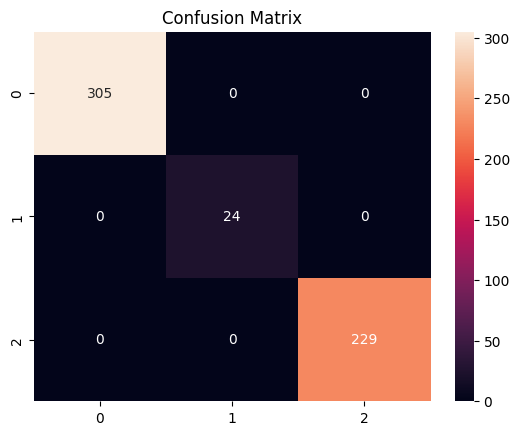

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

pred = rf.predict(X_test)

cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()


In [71]:
avg_yield = paddy_df["paddy_yieldin_kg"].mean()

paddy_df["yield_ratio"] = (
    paddy_df["paddy_yieldin_kg"] / avg_yield
)

In [72]:
def stress_from_yield(r):
    if r > 0.95:
        return "Low"
    elif r > 0.80:
        return "Medium"
    else:
        return "High"

paddy_df["stress_level"] = paddy_df["yield_ratio"].apply(stress_from_yield)

In [73]:
X = paddy_df.select_dtypes("number").drop(
    columns=[
        "paddy_yieldin_kg",
        "yield_ratio"
    ],
    errors="ignore"
)

In [74]:
paddy_df["stress_level"].value_counts()

stress_level
Low     1650
High    1139
Name: count, dtype: int64

In [75]:
paddy_df["yield_ratio"].describe()

count    2789.000000
mean        1.000000
std         0.408552
min         0.240255
25%         0.727827
50%         1.094071
75%         1.378247
max         1.723708
Name: yield_ratio, dtype: float64

In [76]:
paddy_df["stress_level"] = pd.qcut(
    paddy_df["yield_ratio"],
    q=3,
    labels=["High", "Medium", "Low"]
)


In [77]:
paddy_df["stress_level"].value_counts()

stress_level
High      950
Low       923
Medium    916
Name: count, dtype: int64

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(paddy_df["stress_level"])


In [79]:
X = paddy_df.select_dtypes("number").drop(
    columns=["paddy_yieldin_kg", "yield_ratio"],
    errors="ignore"
)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [81]:
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
lr.fit(X_train, y_train)
xgb.fit(X_train, y_train)

c:\Users\Rohit Karumanchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [82]:
from sklearn.metrics import classification_report

for name, model in models.items():
    preds = model.predict(X_test)
    print("\n", name)
    print(classification_report(y_test, preds))



 RandomForest
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       190
           1       0.88      1.00      0.94       185
           2       0.89      0.73      0.80       183

    accuracy                           0.88       558
   macro avg       0.88      0.88      0.88       558
weighted avg       0.88      0.88      0.88       558


 GradientBoost
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       190
           1       0.88      1.00      0.94       185
           2       0.91      0.72      0.80       183

    accuracy                           0.88       558
   macro avg       0.89      0.88      0.88       558
weighted avg       0.89      0.88      0.88       558


 Logistic
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       190
           1       0.88      1.00      0.94       185
           2       0.91      0.72

In [83]:
import joblib

joblib.dump(rf, "stress_model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [84]:
import joblib

joblib.dump(X.columns.tolist(), "model_features.pkl")

['model_features.pkl']

In [85]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [87]:
rain_cols = [
    "30drain_in_mm",
    "30_50drain_in_mm",
    "51_70drainin_mm",
    "71_105drainin_mm"
]

temp_cols = [
    "max_temp_d1_d30",
    "max_temp_d31_d60",
    "max_temp_d61_d90",
    "max_temp_d91_d120"
]

hum_cols = [
    "relative_humidity_d1_d30",
    "relative_humidity_d31_d60",
    "relative_humidity_d61_d90",
    "relative_humidity_d91_d120"
]

In [88]:
rain = paddy_df[rain_cols].values
temp = paddy_df[temp_cols].values
hum = paddy_df[hum_cols].values

X_seq = np.stack([rain, temp, hum], axis=2)

In [89]:
print(X_seq.shape)

(2789, 4, 3)


In [90]:
print(paddy_df.columns)

Index(['hectares', 'agriblock', 'variety', 'soil_types', 'seedratein_kg',
       'lp_mainfieldin_tonnes', 'nursery', 'nursery_area_cents',
       'lp_nurseryareain_tonnes', 'dap_20days', 'weed28d_thiobencarb',
       'urea_40days', 'potassh_50days', 'micronutrients_70days',
       'pest_60dayin_ml', '30drain_in_mm', '30daiin_mm', '30_50drain_in_mm',
       '30_50daiin_mm', '51_70drainin_mm', '51_70aiin_mm', '71_105drainin_mm',
       '71_105daiin_mm', 'min_temp_d1_d30', 'max_temp_d1_d30',
       'min_temp_d31_d60', 'max_temp_d31_d60', 'min_temp_d61_d90',
       'max_temp_d61_d90', 'min_temp_d91_d120', 'max_temp_d91_d120',
       'inst_wind_speed_d1_d30in_knots', 'inst_wind_speed_d31_d60in_knots',
       'inst_wind_speed_d61_d90in_knots', 'inst_wind_speed_d91_d120in_knots',
       'wind_direction_d1_d30', 'wind_direction_d31_d60',
       'wind_direction_d61_d90', 'wind_direction_d91_d120',
       'relative_humidity_d1_d30', 'relative_humidity_d31_d60',
       'relative_humidity_d61_d90'

In [91]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

paddy_df["stress_level_encoded"] = le.fit_transform(
    paddy_df["stress_level"]
)

In [92]:
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'High': 0, 'Low': 1, 'Medium': 2}


In [93]:
y = paddy_df["stress_level_encoded"].values

In [94]:
import joblib
joblib.dump(le, "stress_label_encoder.pkl")

['stress_label_encoder.pkl']

In [95]:
paddy_df["stress_level"].value_counts()


stress_level
High      950
Low       923
Medium    916
Name: count, dtype: int64

In [96]:
from sklearn.ensemble import VotingClassifier

In [97]:
ensemble = VotingClassifier(
    estimators=[
        ("rf", rf),
        ("gb", gb),
        ("xgb", xgb)
    ],
    voting="soft"
)


In [98]:
X_ml = paddy_df.select_dtypes("number").drop(
    columns=[
        "paddy_yieldin_kg",
        "yield_ratio",
        "stress_level_encoded"
    ],
    errors="ignore"
)

In [99]:
y_ml = paddy_df["stress_level_encoded"]

In [100]:
from sklearn.model_selection import train_test_split

X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_ml,
    y_ml,
    test_size=0.2,
    random_state=42,
    stratify=y_ml
)

In [101]:
ensemble.fit(X_train_ml, y_train_ml)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None,...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [102]:
from sklearn.metrics import classification_report

preds = ensemble.predict(X_test_ml)

print(classification_report(y_test_ml, preds))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       190
           1       0.88      1.00      0.94       185
           2       0.89      0.73      0.80       183

    accuracy                           0.88       558
   macro avg       0.88      0.88      0.88       558
weighted avg       0.88      0.88      0.88       558



In [103]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential()

model.add(
    Conv1D(
        filters=64,
        kernel_size=2,
        activation="relu",
        input_shape=(4, 3)
    )
)

model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(3, activation="softmax"))


c:\Users\Rohit Karumanchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
from sklearn.model_selection import train_test_split

y = paddy_df["stress_level_encoded"].values

X_train, X_test, y_train, y_test = train_test_split(
    X_seq,
    y,
    test_size=0.2,
    random_state=42
)

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# reshape for scaler
X_train_flat = X_train.reshape(-1, X_train.shape[-1])
X_test_flat = X_test.reshape(-1, X_test.shape[-1])

# fit ONLY on training
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

# reshape back
X_train = X_train_scaled.reshape(X_train.shape)
X_test = X_test_scaled.reshape(X_test.shape)

In [107]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [108]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32
)

Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3627 - loss: 1.1077 - val_accuracy: 0.3132 - val_loss: 1.1028
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3456 - loss: 1.1038 - val_accuracy: 0.3132 - val_loss: 1.1058
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3510 - loss: 1.1057 - val_accuracy: 0.3557 - val_loss: 1.1057
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3657 - loss: 1.1012 - val_accuracy: 0.3132 - val_loss: 1.1028
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3362 - loss: 1.0995 - val_accuracy: 0.3445 - val_loss: 1.1031
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3439 - loss: 1.1003 - val_accuracy: 0.3400 - val_loss: 1.1020
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3518 - loss: 1.0995 - val_accuracy: 0.3378 - val_loss: 1.1020
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3450 - loss: 1.0978 - val_accuracy: 0.3110 - val_loss:

In [109]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [110]:
results = []

models_ml = {
    "RandomForest": rf,
    "GradientBoost": gb,
    "Logistic": lr,
    "XGBoost": xgb,
    "Ensemble": ensemble
}

for name, model_ml in models_ml.items():

    preds = model_ml.predict(X_test_ml)

    acc = accuracy_score(y_test_ml, preds)
    prec = precision_score(y_test_ml, preds, average="macro")
    rec = recall_score(y_test_ml, preds, average="macro")
    f1 = f1_score(y_test_ml, preds, average="macro")

    results.append([name, acc, prec, rec, f1])

In [111]:
cnn_probs = model.predict(X_test)
cnn_preds = np.argmax(cnn_probs, axis=1)

cnn_acc = accuracy_score(y_test, cnn_preds)
cnn_prec = precision_score(y_test, cnn_preds, average="macro")
cnn_rec = recall_score(y_test, cnn_preds, average="macro")
cnn_f1 = f1_score(y_test, cnn_preds, average="macro")

results.append(["CNN", cnn_acc, cnn_prec, cnn_rec, cnn_f1])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\Rohit Karumanchi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [112]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)

results_df.sort_values("Accuracy", ascending=False)

,Model,Accuracy,Precision,Recall,F1-score
1,GradientBoost,0.883513,0.886107,0.882475,0.878803
2,Logistic,0.883513,0.886107,0.882475,0.878803
3,XGBoost,0.883513,0.886107,0.882475,0.878803
0,RandomForest,0.879928,0.880452,0.879101,0.875753
4,Ensemble,0.879928,0.880452,0.879101,0.875753
5,CNN,0.295699,0.198427,0.300089,0.236932


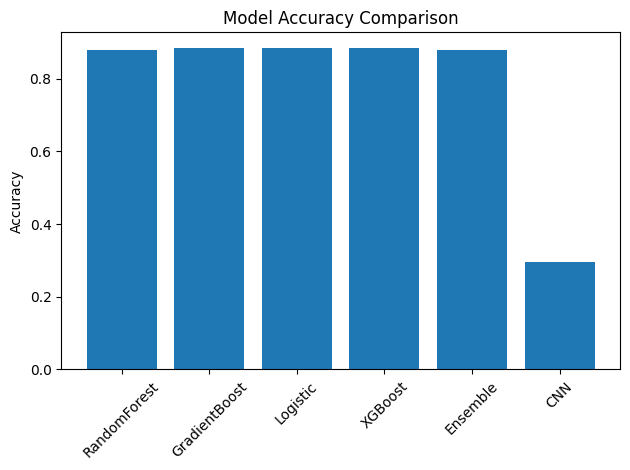

In [113]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

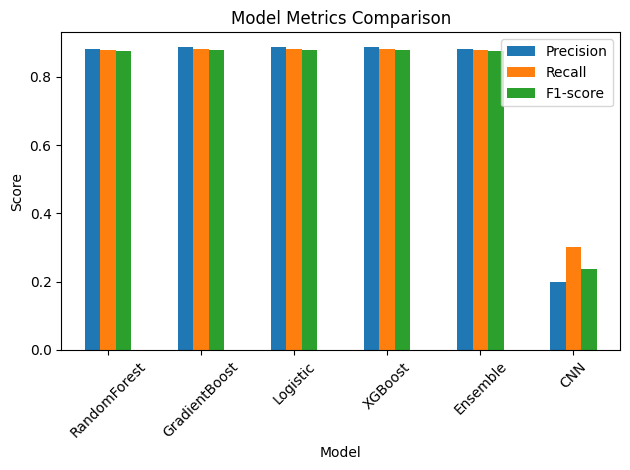

In [114]:
results_df.set_index("Model")[[
    "Precision", "Recall", "F1-score"
]].plot(kind="bar")

plt.title("Model Metrics Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()